Validation F1 Score: 0.9560117302052786
Submission file saved to: Raad.csv


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


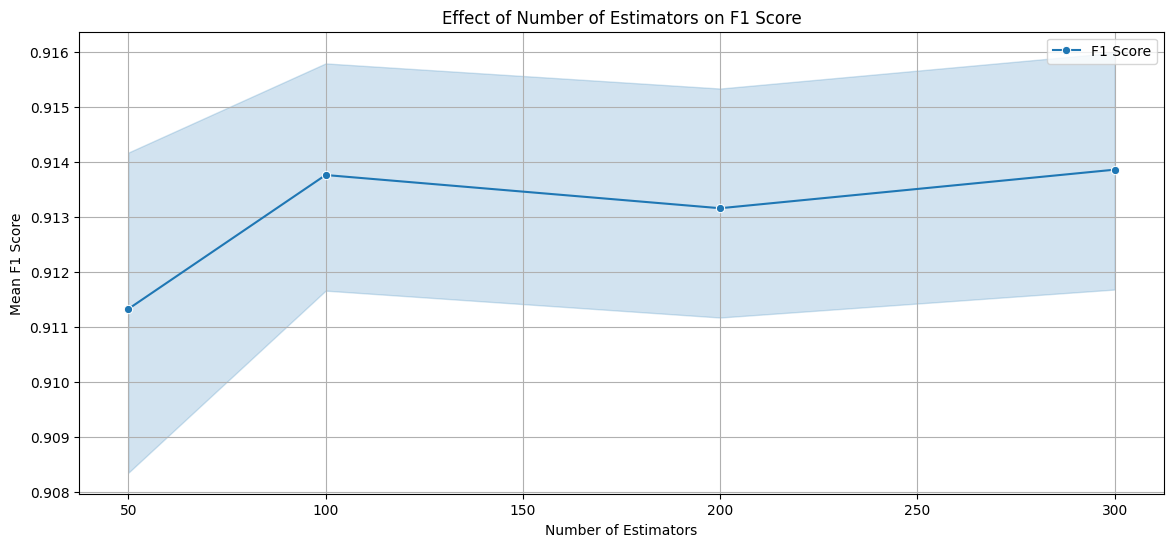

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


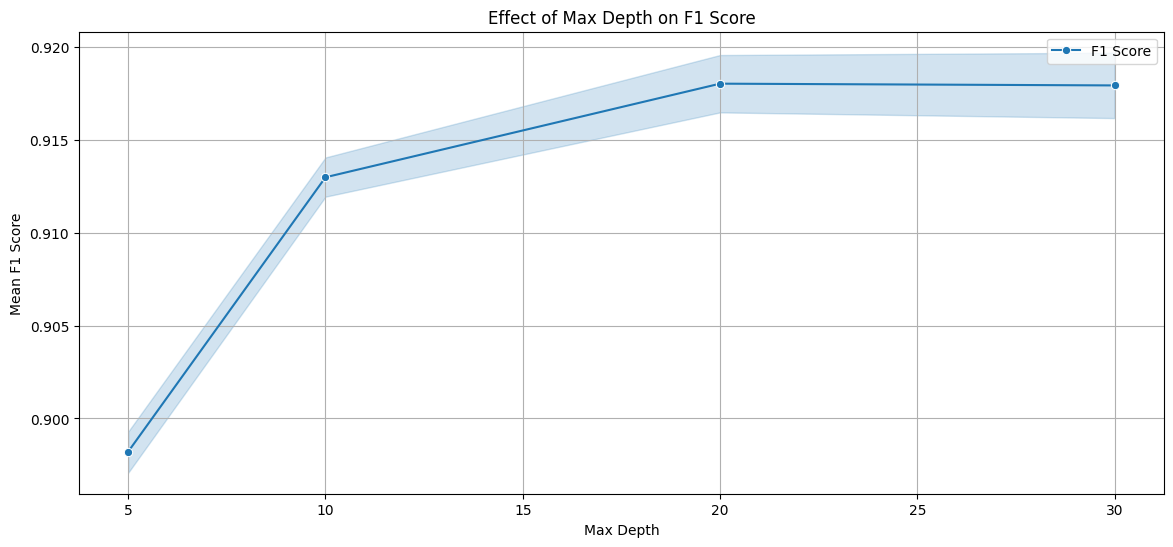

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


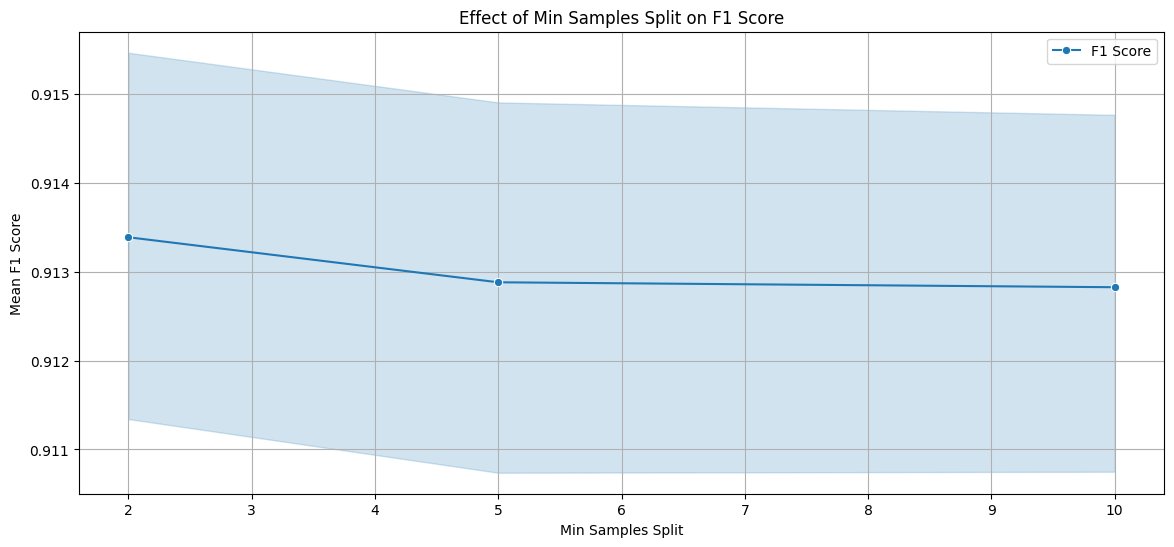

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


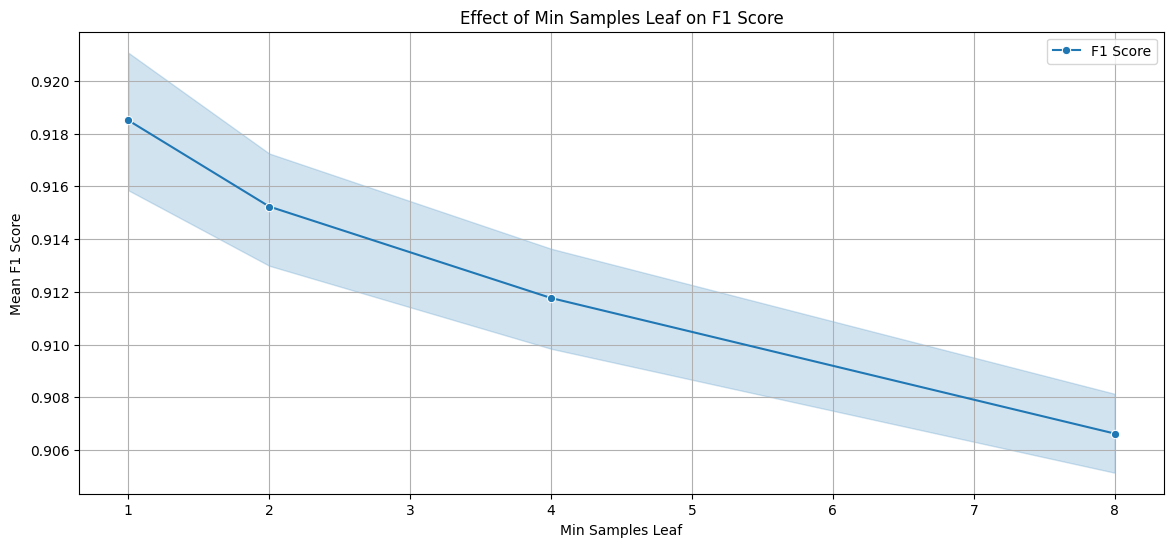

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def random_forest_with_plot(train_csv, test_csv, output_csv):
    """
    Train a Random Forest model with hyperparameter tuning, evaluate its performance,
    and predict the test data, while plotting the hyperparameter tuning results.

    Parameters:
    - train_csv: Path to the training data CSV file
    - test_csv: Path to the test data CSV file
    - output_csv: Path to save the output predictions CSV file
    """

    # Load the data
    train_data = pd.read_csv(train_csv)
    test_data = pd.read_csv(test_csv)

    # Separate features and target variable from training data
    X = train_data.drop(columns=['spam'])
    y = train_data['spam']
    # Copy test data for predictions
    X_test = test_data.copy()

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=50)

    # Define the hyperparameter grid
    param_grid = {
     'n_estimators': [50, 100, 200, 300],  
        'max_depth': [None, 5, 10, 20, 30],  
        'min_samples_split': [2, 5, 10],     
        'min_samples_leaf': [1, 2, 4, 8]    
    }

    # Initialize and configure the Random Forest classifier
    rf_model = RandomForestClassifier(random_state=50)

    # Perform hyperparameter tuning using Grid Search with Cross-Validation
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Retrieve the best model from Grid Search
    best_rf_model = grid_search.best_estimator_

    # Evaluate the model on the validation data
    y_val_pred = best_rf_model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred, zero_division=1)
    print(f'Validation F1 Score: {f1}')

    # Make predictions on the test data using the best model
    test_predictions = best_rf_model.predict(X_test)

    # Prepare the submission DataFrame
    submission = pd.DataFrame({
        'ID': test_data['ID'],
        'spam': test_predictions
    })

    # Save the submission file
    submission.to_csv(output_csv, index=False)
    print(f'Submission file saved to: {output_csv}')

    # Plot the hyperparameter tuning results
    plot_hyperparameter_tuning_results(grid_search)

def plot_hyperparameter_tuning_results(grid_search):
    """
    Plot the hyperparameter tuning results from GridSearchCV.

    Parameters:
    - grid_search: Fitted GridSearchCV object
    """
    results = pd.DataFrame(grid_search.cv_results_)

    # Plot n_estimators vs F1 score
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score', marker='o', label='F1 Score')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean F1 Score')
    plt.title('Effect of Number of Estimators on F1 Score')
    plt.grid(True)
    plt.show()

    # Plot max_depth vs F1 score
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=results, x='param_max_depth', y='mean_test_score', marker='o', label='F1 Score')
    plt.xlabel('Max Depth')
    plt.ylabel('Mean F1 Score')
    plt.title('Effect of Max Depth on F1 Score')
    plt.grid(True)
    plt.show()

    # Plot min_samples_split vs F1 score
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=results, x='param_min_samples_split', y='mean_test_score', marker='o', label='F1 Score')
    plt.xlabel('Min Samples Split')
    plt.ylabel('Mean F1 Score')
    plt.title('Effect of Min Samples Split on F1 Score')
    plt.grid(True)
    plt.show()

    # Plot min_samples_leaf vs F1 score
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=results, x='param_min_samples_leaf', y='mean_test_score', marker='o', label='F1 Score')
    plt.xlabel('Min Samples Leaf')
    plt.ylabel('Mean F1 Score')
    plt.title('Effect of Min Samples Leaf on F1 Score')
    plt.grid(True)
    plt.show()

# Example usage
random_forest_with_plot(
    train_csv='/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv',
    test_csv='/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv',
    output_csv='Raad.csv'
)